# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import datetime as dt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score,precision_score 
from sklearn.metrics import classification_report,cohen_kappa_score ,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier,\
StackingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [3]:
data_raw = pd.read_csv('storedata_total.csv')
data_raw.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,28-09-2012,11-08-2013,11-08-2013,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,19-12-2010,01-04-2011,19-01-2014,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,03-10-2010,01-12-2010,06-07-2011,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,22-10-2010,28-03-2011,28-03-2011,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,27-11-2010,29-11-2010,28-01-2013,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [4]:
process_data = pd.read_csv('clean_data.csv')
process_data.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [5]:
copy_data = process_data.copy()
copy_data.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [6]:
encode_data = pd.get_dummies(process_data[['favday','city']],drop_first=True)
encode_data.head()

,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0


In [7]:
copy_data = copy_data.drop(['created','firstorder','lastorder','favday','city'],axis=1)
copy_data.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,eopen,tenure,recency
0,0,29,100.000000,3.448276,14.52,0.000000,0,0,0,29,1.112329,5.065753
1,1,95,92.631579,10.526316,83.69,0.181641,1,1,1,89,3.087671,4.868493
2,0,0,0.000000,0.000000,54.96,0.000000,0,0,0,0,0.430137,7.684932
3,1,30,90.000000,13.333333,111.91,0.008850,0,0,0,27,2.172603,5.843836
4,1,46,80.434783,15.217391,175.10,0.141176,1,1,0,38,5.161644,4.882192


In [8]:
df = pd.concat([copy_data,encode_data],axis=1)
df.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,eopen,...,recency,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,0,29,100.000000,3.448276,14.52,0.000000,0,0,0,29,...,5.065753,1,0,0,0,0,0,0,1,0
1,1,95,92.631579,10.526316,83.69,0.181641,1,1,1,89,...,4.868493,0,0,0,0,0,0,0,1,0
2,0,0,0.000000,0.000000,54.96,0.000000,0,0,0,0,...,7.684932,0,0,0,1,0,0,1,0,0
3,1,30,90.000000,13.333333,111.91,0.008850,0,0,0,27,...,5.843836,1,0,0,0,0,0,1,0,0
4,1,46,80.434783,15.217391,175.10,0.141176,1,1,0,38,...,4.882192,0,0,0,0,0,1,0,1,0


In [9]:
df.to_csv('encoded_data.csv',index = None,header=True)

In [10]:
X = df.drop('retained',axis=1)
y = df['retained']

# class imbalance treatment using smote

In [11]:
score_card1 = pd.DataFrame(columns=['Model','Precision Score','Recall Score','Accuracy Score','f1-score','AUC Score'])

def scores1(model_name,y_test,y_pred):
    precision = round(precision_score(y_test,y_pred),2)
    recall    = round(recall_score(y_test,y_pred),2)
    accuracy  = round(accuracy_score(y_test,y_pred),2)   
    f1        = round(f1_score(y_test,y_pred),2)
    auc       = round(roc_auc_score(y_test, y_pred),4)
    global score_card1
    score_card1 = score_card1.append({'Model' : model_name,                              
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred),
                                    'AUC Score' : roc_auc_score(y_test, y_pred)
                                    },ignore_index = True)
    return score_card1.sort_values(by='f1-score',ascending= False).reset_index(drop=True)
    
# Logistic Regression
def log_reg1(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    name = 'Logistic Regression'
    log_score = scores1(name,y_test,pred)
    return log_score


# Decision Tree Classifier
def dtree1(X_train,X_test, y_train,y_test):
    decision_tree = DecisionTreeClassifier()
    dt_model = decision_tree.fit(X_train,y_train)
    pred = dt_model.predict(X_test)
    name = 'Decision Tree'
    dt_score = scores1(name,y_test,pred)
    return dt_score

#Random Forest Classifier
def random1(X_train,X_test, y_train,y_test):
    rf = RandomForestClassifier()
    rf_model = rf.fit(X_train,y_train)
    pred = rf_model.predict(X_test)
    name = 'Random Forest'
    rf_score = scores1(name,y_test,pred)
    return rf_score

#Ada Boost Classifier
def ada1(X_train,X_test, y_train,y_test):
    ad = AdaBoostClassifier()
    ad_model = ad.fit(X_train,y_train)
    pred = ad_model.predict(X_test)
    name = 'Ada Boost'
    ad_score = scores1(name,y_test,pred)
    return ad_score

#Gradient Boosting Classifier
def gboost1(X_train,X_test, y_train,y_test):
    gb = GradientBoostingClassifier()
    gb_model = gb.fit(X_train,y_train)
    pred = gb_model.predict(X_test)
    name = 'Gradient Boosting'
    gb_score = scores1(name,y_test,pred)
    return gb_score

#Gaussian NB
def gnb1(X_train,X_test, y_train,y_test):
    nb = GaussianNB()
    nb_model = nb.fit(X_train,y_train)
    pred = nb_model.predict(X_test)
    name = 'Gaussian NB'
    nb_score = scores1(name,y_test,pred)
    return nb_score


#Bagging Classifier
def bag1(X_train,X_test, y_train,y_test):
    bg = BaggingClassifier()
    bg_model = bg.fit(X_train,y_train)
    pred = bg_model.predict(X_test)
    name = 'Bagging Classifier'
    bg_score = scores1(name,y_test,pred)
    return bg_score


#Extreme Gradient Boost Classifier
def xgb1(X_train,X_test, y_train,y_test):
    xg = XGBClassifier()
    xg_model = xg.fit(X_train,y_train)
    pred = xg_model.predict(X_test)
    name = 'Extreme Gradient Boost Classifier'
    xg_score = scores1(name,y_test,pred)
    return xg_score


In [12]:
s = SMOTE(random_state = 2)
X_smot, y_smot = s.fit_resample(X, y)

In [13]:
y_smot.value_counts(normalize=True)

1    0.5
0    0.5
Name: retained, dtype: float64

In [22]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smot, y_smot, random_state = 10, test_size = 0.3)

In [23]:
log_reg1(X_train_s, X_test_s, y_train_s, y_test_s)
dtree1(X_train_s, X_test_s, y_train_s, y_test_s)
random1(X_train_s, X_test_s, y_train_s, y_test_s)
ada1(X_train_s, X_test_s, y_train_s, y_test_s)
gboost1(X_train_s, X_test_s, y_train_s, y_test_s)
gnb1(X_train_s, X_test_s, y_train_s, y_test_s)
bag1(X_train_s, X_test_s, y_train_s, y_test_s)

xgb1(X_train_s, X_test_s, y_train_s, y_test_s)

[22:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Extreme Gradient Boost Classifier,0.970018,0.980710,0.974825,0.975335,0.974735
1,Random Forest,0.965649,0.979737,0.972028,0.972642,0.971910
2,Bagging Classifier,0.967621,0.964014,0.965364,0.965814,0.965385
3,Gradient Boosting,0.949425,0.976820,0.961826,0.962927,0.961597
4,Ada Boost,0.947861,0.969525,0.957466,0.958570,0.957282
5,Decision Tree,0.952535,0.953153,0.952118,0.952844,0.952103
6,Logistic Regression,0.936283,0.919436,0.927355,0.927783,0.927476
7,Gaussian NB,0.921636,0.869347,0.896174,0.894728,0.896584


In [24]:
conf_mat = pd.DataFrame(columns=['Model','Precision','Sensitivity','Correct_classfication','Misclassfication'])

def plot_confusion_matrix(model,name,X_train,X_test, y_train,y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
        
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PiYG', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    correct_classfication = ((TN+TP)/(TP+TN+FP+FN))*100
    misclassfication = ((FN+FP)/(TP+TN+FP+FN))*100
    global conf_mat
    conf_mat = conf_mat.append({'Model' : name,                              
                                    'Precision': precision,
                                    'Sensitivity': sensitivity,
                                    'Correct_classfication': correct_classfication,
                                    'Misclassfication': misclassfication,
                                    },ignore_index = True)
    return conf_mat
    

Logistic Regression :



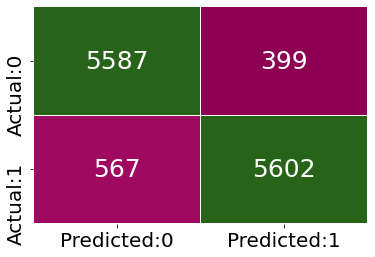

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   

   Misclassfication  
0          7.947347  
*************************************************************************************
Decision Tree :



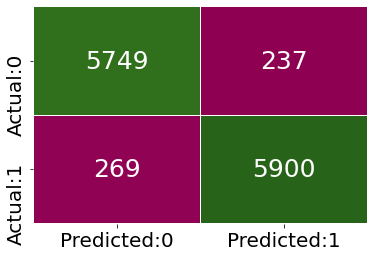

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   

   Misclassfication  
0          7.947347  
1          4.162896  
*************************************************************************************
Random Forest :



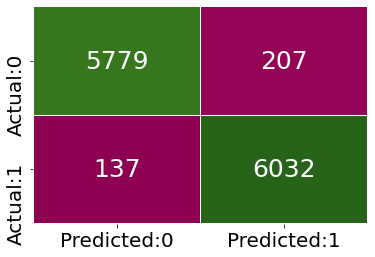

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
*************************************************************************************
KNeighbors :



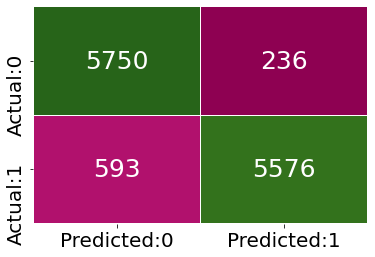

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   
3           KNeighbors   0.959394     0.903874              93.179761   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
*************************************************************************************
Ada Boost :



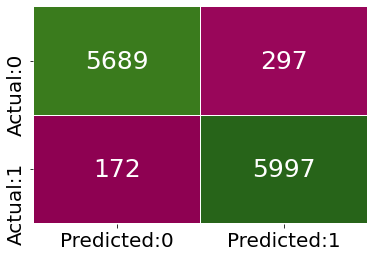

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   
3           KNeighbors   0.959394     0.903874              93.179761   
4            Ada Boost   0.952812     0.972119              96.141506   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
4          3.858494  
*************************************************************************************
Gradient Boosting :



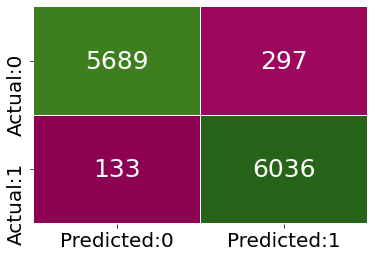

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   
3           KNeighbors   0.959394     0.903874              93.179761   
4            Ada Boost   0.952812     0.972119              96.141506   
5    Gradient Boosting   0.953103     0.978441              96.462361   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
4          3.858494  
5          3.537639  
*************************************************************************************
Gaussian NB :



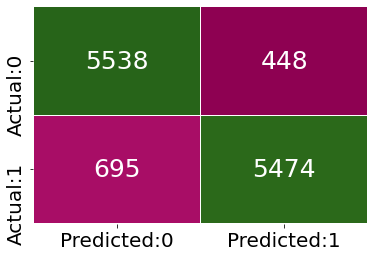

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   
3           KNeighbors   0.959394     0.903874              93.179761   
4            Ada Boost   0.952812     0.972119              96.141506   
5    Gradient Boosting   0.953103     0.978441              96.462361   
6          Gaussian NB   0.924350     0.887340              90.596462   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
4          3.858494  
5          3.537639  
6          9.403538  
*************************************************************************************
Bagging Classifier :



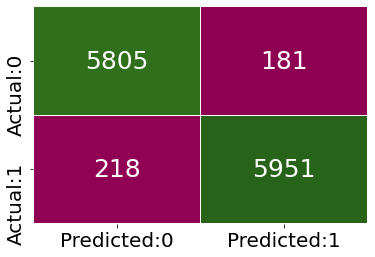

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.933511     0.908089              92.052653   
1        Decision Tree   0.961382     0.956395              95.837104   
2        Random Forest   0.966822     0.977792              97.169889   
3           KNeighbors   0.959394     0.903874              93.179761   
4            Ada Boost   0.952812     0.972119              96.141506   
5    Gradient Boosting   0.953103     0.978441              96.462361   
6          Gaussian NB   0.924350     0.887340              90.596462   
7   Bagging Classifier   0.970483     0.964662              96.717400   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
4          3.858494  
5          3.537639  
6          9.403538  
7          3.282600  
*************************************************************************************
Extreme Gradient Boosting :

[16:11:04] WARNING: C:/Users/

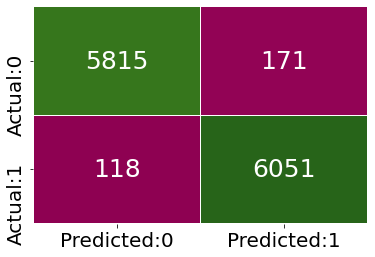

                       Model  Precision  Sensitivity  Correct_classfication  \
0        Logistic Regression   0.933511     0.908089              92.052653   
1              Decision Tree   0.961382     0.956395              95.837104   
2              Random Forest   0.966822     0.977792              97.169889   
3                 KNeighbors   0.959394     0.903874              93.179761   
4                  Ada Boost   0.952812     0.972119              96.141506   
5          Gradient Boosting   0.953103     0.978441              96.462361   
6                Gaussian NB   0.924350     0.887340              90.596462   
7         Bagging Classifier   0.970483     0.964662              96.717400   
8  Extreme Gradient Boosting   0.972517     0.980872              97.622378   

   Misclassfication  
0          7.947347  
1          4.162896  
2          2.830111  
3          6.820239  
4          3.858494  
5          3.537639  
6          9.403538  
7          3.282600  
8          

In [34]:
print('Logistic Regression :\n')
print(plot_confusion_matrix(LR,'Logistic Regression',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Decision Tree :\n')
print(plot_confusion_matrix(DT,'Decision Tree',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Random Forest :\n')
print(plot_confusion_matrix(RF,'Random Forest',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)


print('Ada Boost :\n')
print(plot_confusion_matrix(AB,'Ada Boost',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Gradient Boosting :\n')
print(plot_confusion_matrix(GB,'Gradient Boosting',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Gaussian NB :\n')
print(plot_confusion_matrix(NB,'Gaussian NB',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Bagging Classifier :\n')
print(plot_confusion_matrix(Bag,'Bagging Classifier',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

print('Extreme Gradient Boosting :\n')
print(plot_confusion_matrix(Xg,'Extreme Gradient Boosting',X_train_s, X_test_s, y_train_s, y_test_s))
print('*'*85)

In [34]:
def get_train_report(model,X_train,y_train):
    train_pred = model.fit(X_train,y_train).predict(X_train)
    return f'\nTrain report : \n {classification_report(y_train, train_pred)}'

def get_test_report(model,X_test,y_test):
    test_pred = model.fit(X_test,y_test).predict(X_test)
    return f'\nTest report : \n {classification_report(y_test, test_pred)}'

In [35]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()
NB = GaussianNB()
Bag = BaggingClassifier()
Xg = XGBClassifier()

In [36]:
print('Logistic Regression :\n')
print(get_train_report(LR,X_train_s,y_train_s))
print(get_test_report(LR,X_test_s,y_test_s))
print('*'*85)

print('Decision Tree :\n')
print(get_train_report(DT,X_train_s,y_train_s))
print(get_test_report(DT,X_test_s,y_test_s))
print('*'*85)

print('Random Forest :\n')
print(get_train_report(RF,X_train_s,y_train_s))
print(get_test_report(RF,X_test_s,y_test_s))
print('*'*85)


print('Ada Boost :\n')
print(get_train_report(AB,X_train_s,y_train_s))
print(get_test_report(AB,X_test_s,y_test_s))
print('*'*85)

print('Gradient Boosting :\n')
print(get_train_report(GB,X_train_s,y_train_s))
print(get_test_report(GB,X_test_s,y_test_s))
print('*'*85)

print('Gaussian NB :\n')
print(get_train_report(NB,X_train_s,y_train_s))
print(get_test_report(NB,X_test_s,y_test_s))
print('*'*85)

print('Bagging Classifier :\n')
print(get_train_report(Bag,X_train_s,y_train_s))
print(get_test_report(Bag,X_test_s,y_test_s))
print('*'*85)

print('Extreme Gradient Boosting :\n')
print(get_train_report(Xg,X_train_s,y_train_s))
print(get_test_report(Xg,X_test_s,y_test_s))
print('*'*85)

Logistic Regression :


Train report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     14271
           1       0.93      0.93      0.93     14088

    accuracy                           0.93     28359
   macro avg       0.93      0.93      0.93     28359
weighted avg       0.93      0.93      0.93     28359


Test report : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      5986
           1       0.93      0.92      0.93      6169

    accuracy                           0.93     12155
   macro avg       0.93      0.93      0.93     12155
weighted avg       0.93      0.93      0.93     12155

*************************************************************************************
Decision Tree :


Train report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14271
           1       1.00      1.00      1.00     14088

   

# based on statistical significance

In [37]:
df_stat =df.copy()
df_stat.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,eopen,...,recency,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,0,29,100.000000,3.448276,14.52,0.000000,0,0,0,29,...,5.065753,1,0,0,0,0,0,0,1,0
1,1,95,92.631579,10.526316,83.69,0.181641,1,1,1,89,...,4.868493,0,0,0,0,0,0,0,1,0
2,0,0,0.000000,0.000000,54.96,0.000000,0,0,0,0,...,7.684932,0,0,0,1,0,0,1,0,0
3,1,30,90.000000,13.333333,111.91,0.008850,0,0,0,27,...,5.843836,1,0,0,0,0,0,1,0,0
4,1,46,80.434783,15.217391,175.10,0.141176,1,1,0,38,...,4.882192,0,0,0,0,0,1,0,1,0


In [38]:
X_stat = df_stat.drop(['retained','eopenrate','avgorder','tenure'],axis=1)
y_stat = df_stat['retained']

X_train_stat, X_test_stat, y_train_stat, y_test_stat = train_test_split(X_stat, y_stat, random_state = 10, test_size = 0.3)

In [39]:
score_card_stat = pd.DataFrame(columns=['Model','Precision Score','Recall Score','Accuracy Score','f1-score','AUC Score'])

def scores(model_name,y_test,y_pred):
    precision = round(precision_score(y_test,y_pred),2)
    recall    = round(recall_score(y_test,y_pred),2)
    accuracy  = round(accuracy_score(y_test,y_pred),2)   
    f1        = round(f1_score(y_test,y_pred),2)
    auc       = round(roc_auc_score(y_test, y_pred),4)
    global score_card_stat
    score_card_stat = score_card_stat.append({'Model' : model_name,                              
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred),
                                    'AUC Score' : roc_auc_score(y_test, y_pred)
                                    },ignore_index = True)
    return score_card_stat.sort_values(by='f1-score',ascending= False).reset_index(drop=True)
    
# Logistic Regression
def log_reg_stat(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    name = 'Logistic Regression'
    log_score = scores(name,y_test,pred)
    return log_score


# Decision Tree Classifier
def dtree_stat(X_train,X_test, y_train,y_test):
    decision_tree = DecisionTreeClassifier()
    dt_model = decision_tree.fit(X_train,y_train)
    pred = dt_model.predict(X_test)
    name = 'Decision Tree'
    dt_score = scores(name,y_test,pred)
    return dt_score

#Random Forest Classifier
def random_stat(X_train,X_test, y_train,y_test):
    rf = RandomForestClassifier()
    rf_model = rf.fit(X_train,y_train)
    pred = rf_model.predict(X_test)
    name = 'Random Forest'
    rf_score = scores(name,y_test,pred)
    return rf_score

#Ada Boost Classifier
def ada_stat(X_train,X_test, y_train,y_test):
    ad = AdaBoostClassifier()
    ad_model = ad.fit(X_train,y_train)
    pred = ad_model.predict(X_test)
    name = 'Ada Boost'
    ad_score = scores(name,y_test,pred)
    return ad_score

#Gradient Boosting Classifier
def gboost_stat(X_train,X_test, y_train,y_test):
    gb = GradientBoostingClassifier()
    gb_model = gb.fit(X_train,y_train)
    pred = gb_model.predict(X_test)
    name = 'Gradient Boosting'
    gb_score = scores(name,y_test,pred)
    return gb_score

#Gaussian NB
def gnb_stat(X_train,X_test, y_train,y_test):
    nb = GaussianNB()
    nb_model = nb.fit(X_train,y_train)
    pred = nb_model.predict(X_test)
    name = 'Gaussian NB'
    nb_score = scores(name,y_test,pred)
    return nb_score


#Bagging Classifier
def bag_stat(X_train,X_test, y_train,y_test):
    bg = BaggingClassifier()
    bg_model = bg.fit(X_train,y_train)
    pred = bg_model.predict(X_test)
    name = 'Bagging Classifier'
    bg_score = scores(name,y_test,pred)
    return bg_score


#Extreme Gradient Boost Classifier
def xgb_stat(X_train,X_test, y_train,y_test):
    xg = XGBClassifier()
    xg_model = xg.fit(X_train,y_train)
    pred = xg_model.predict(X_test)
    name = 'Extreme Gradient Boost Classifier'
    xg_score = scores(name,y_test,pred)
    return xg_score


In [40]:
log_reg_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
dtree_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
random_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
ada_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
gboost_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
gnb_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
bag_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)
xgb_stat(X_train_stat, X_test_stat, y_train_stat, y_test_stat)

[22:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Extreme Gradient Boost Classifier,0.971735,0.984367,0.964652,0.978010,0.935432
1,Random Forest,0.966769,0.986177,0.961892,0.976377,0.925900
2,Gradient Boosting,0.966742,0.985355,0.961235,0.975960,0.925489
3,Bagging Classifier,0.972045,0.978443,0.960315,0.975234,0.933449
4,Ada Boost,0.960480,0.987823,0.957819,0.973960,0.913350
5,Decision Tree,0.967087,0.971861,0.951117,0.969468,0.920373
6,Logistic Regression,0.956833,0.966595,0.938502,0.961690,0.896866
7,Gaussian NB,0.953650,0.900609,0.885677,0.926371,0.863546


In [41]:
conf_mat = pd.DataFrame(columns=['Model','Precision','Sensitivity','Correct_classfication','Misclassfication'])

def plot_confusion_matrix(model,name,X_train,X_test, y_train,y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
        
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PiYG', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    correct_classfication = ((TN+TP)/(TP+TN+FP+FN))*100
    misclassfication = ((FN+FP)/(TP+TN+FP+FN))*100
    global conf_mat
    conf_mat = conf_mat.append({'Model' : name,                              
                                    'Precision': precision,
                                    'Sensitivity': sensitivity,
                                    'Correct_classfication': correct_classfication,
                                    'Misclassfication': misclassfication,
                                    },ignore_index = True)
    return conf_mat
    

Logistic Regression :



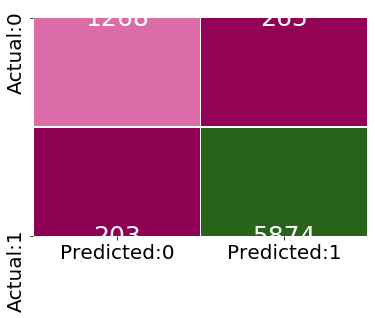

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   

   Misclassfication  
0          6.149803  
*************************************************************************************
Decision Tree :



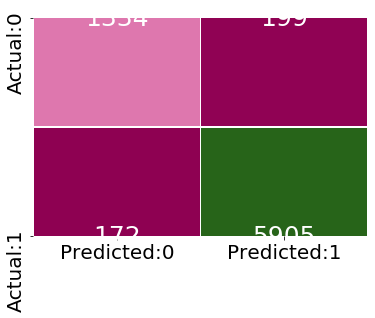

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   

   Misclassfication  
0          6.149803  
1          4.875164  
*************************************************************************************
Random Forest :



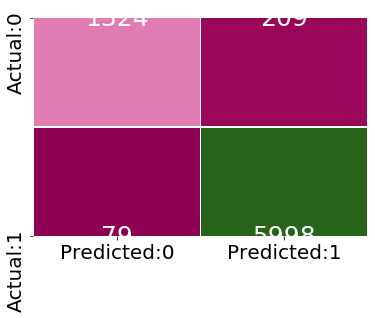

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   
2        Random Forest   0.966328     0.987000              96.215506   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
*************************************************************************************
Ada Boost :



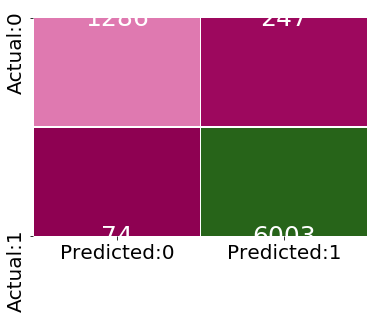

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   
2        Random Forest   0.966328     0.987000              96.215506   
3            Ada Boost   0.960480     0.987823              95.781866   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
3          4.218134  
*************************************************************************************
Gradient Boosting :



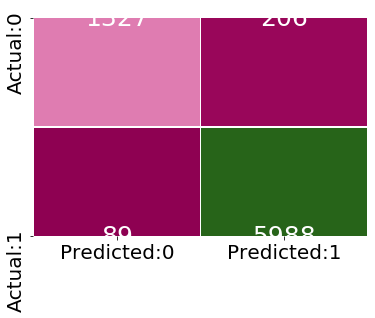

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   
2        Random Forest   0.966328     0.987000              96.215506   
3            Ada Boost   0.960480     0.987823              95.781866   
4    Gradient Boosting   0.966742     0.985355              96.123522   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
3          4.218134  
4          3.876478  
*************************************************************************************
Gaussian NB :



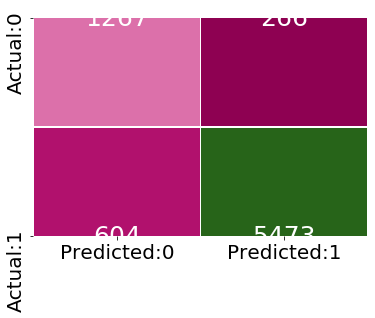

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   
2        Random Forest   0.966328     0.987000              96.215506   
3            Ada Boost   0.960480     0.987823              95.781866   
4    Gradient Boosting   0.966742     0.985355              96.123522   
5          Gaussian NB   0.953650     0.900609              88.567674   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
3          4.218134  
4          3.876478  
5         11.432326  
*************************************************************************************
Bagging Classifier :



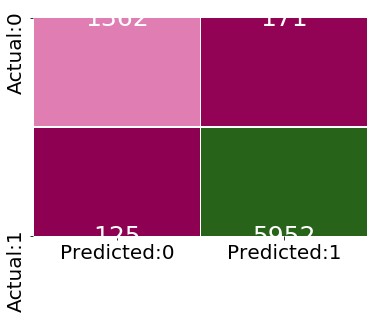

                 Model  Precision  Sensitivity  Correct_classfication  \
0  Logistic Regression   0.956833     0.966595              93.850197   
1        Decision Tree   0.967398     0.971697              95.124836   
2        Random Forest   0.966328     0.987000              96.215506   
3            Ada Boost   0.960480     0.987823              95.781866   
4    Gradient Boosting   0.966742     0.985355              96.123522   
5          Gaussian NB   0.953650     0.900609              88.567674   
6   Bagging Classifier   0.972073     0.979431              96.110381   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
3          4.218134  
4          3.876478  
5         11.432326  
6          3.889619  
*************************************************************************************
Extreme Gradient Boosting :

[22:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.

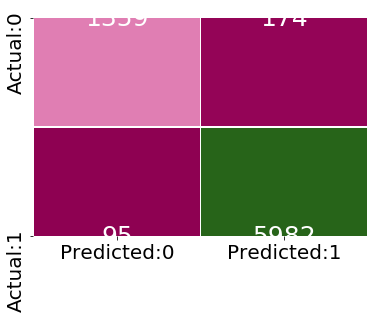

                       Model  Precision  Sensitivity  Correct_classfication  \
0        Logistic Regression   0.956833     0.966595              93.850197   
1              Decision Tree   0.967398     0.971697              95.124836   
2              Random Forest   0.966328     0.987000              96.215506   
3                  Ada Boost   0.960480     0.987823              95.781866   
4          Gradient Boosting   0.966742     0.985355              96.123522   
5                Gaussian NB   0.953650     0.900609              88.567674   
6         Bagging Classifier   0.972073     0.979431              96.110381   
7  Extreme Gradient Boosting   0.971735     0.984367              96.465177   

   Misclassfication  
0          6.149803  
1          4.875164  
2          3.784494  
3          4.218134  
4          3.876478  
5         11.432326  
6          3.889619  
7          3.534823  
*************************************************************************************


In [42]:
print('Logistic Regression :\n')
print(plot_confusion_matrix(LR,'Logistic Regression',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Decision Tree :\n')
print(plot_confusion_matrix(DT,'Decision Tree',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Random Forest :\n')
print(plot_confusion_matrix(RF,'Random Forest',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)


print('Ada Boost :\n')
print(plot_confusion_matrix(AB,'Ada Boost',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Gradient Boosting :\n')
print(plot_confusion_matrix(GB,'Gradient Boosting',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Gaussian NB :\n')
print(plot_confusion_matrix(NB,'Gaussian NB',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Bagging Classifier :\n')
print(plot_confusion_matrix(Bag,'Bagging Classifier',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

print('Extreme Gradient Boosting :\n')
print(plot_confusion_matrix(Xg,'Extreme Gradient Boosting',X_train_stat, X_test_stat, y_train_stat, y_test_stat))
print('*'*85)

In [43]:
print('Logistic Regression :\n')
print(get_train_report(LR,X_train_stat,y_train_stat))
print(get_test_report(LR,X_test_stat,y_test_stat))
print('*'*85)

print('Decision Tree :\n')
print(get_train_report(DT,X_train_stat,y_train_stat))
print(get_test_report(DT,X_test_stat,y_test_stat))
print('*'*85)

print('Random Forest :\n')
print(get_train_report(RF,X_train_stat,y_train_stat))
print(get_test_report(RF,X_test_stat,y_test_stat))
print('*'*85)


print('Ada Boost :\n')
print(get_train_report(AB,X_train_stat,y_train_stat))
print(get_test_report(AB,X_test_stat,y_test_stat))
print('*'*85)

print('Gradient Boosting :\n')
print(get_train_report(GB,X_train_stat,y_train_stat))
print(get_test_report(GB,X_test_stat,y_test_stat))
print('*'*85)

print('Gaussian NB :\n')
print(get_train_report(NB,X_train_stat,y_train_stat))
print(get_test_report(NB,X_test_stat,y_test_stat))
print('*'*85)

print('Bagging Classifier :\n')
print(get_train_report(Bag,X_train_stat,y_train_stat))
print(get_test_report(Bag,X_test_stat,y_test_stat))
print('*'*85)

print('Extreme Gradient Boosting :\n')
print(get_train_report(Xg,X_train_stat,y_train_stat))
print(get_test_report(Xg,X_test_stat,y_test_stat))
print('*'*85)

Logistic Regression :


Train report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      3575
           1       0.96      0.97      0.96     14180

    accuracy                           0.94     17755
   macro avg       0.92      0.90      0.91     17755
weighted avg       0.94      0.94      0.94     17755


Test report : 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1533
           1       0.96      0.97      0.97      6077

    accuracy                           0.94      7610
   macro avg       0.92      0.90      0.91      7610
weighted avg       0.94      0.94      0.94      7610

*************************************************************************************
Decision Tree :


Train report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00     14180

   

# Grid search CV

In [44]:
score_card_grid = pd.DataFrame(columns=['Model','Precision Score','Recall Score','Accuracy Score','f1-score','AUC Score'])

def scores(model_name,y_test,y_pred):
    precision = round(precision_score(y_test,y_pred),2)
    recall    = round(recall_score(y_test,y_pred),2)
    accuracy  = round(accuracy_score(y_test,y_pred),2)   
    f1        = round(f1_score(y_test,y_pred),2)
    auc       = round(roc_auc_score(y_test, y_pred),4)
    global score_card_grid
    score_card_grid = score_card_grid.append({'Model' : model_name,                              
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred),
                                    'AUC Score' : roc_auc_score(y_test, y_pred)
                                    },ignore_index = True)
    return score_card_grid.sort_values(by='f1-score',ascending= False).reset_index(drop=True)
    


# # Extreme Gradient boost

In [58]:
X_grid = df.drop(['retained','avgorder','tenure','eopenrate'],axis=1)
y_grid = df['retained']

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid, random_state = 10, test_size = 0.3)

In [59]:
params = {'learning_rate': [0.0001, 0.001, 0.01,0.1],
        'n_estimators':range(20,201,10),
        'max_depth':range(5,51,5),
        'min_samples_split':range(100,5001,500),
        'max_features':range(6,22,2),
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        'min_child_weight': [1, 5, 10],
        'gamma': [0,0.5,1, 1.5, 2,3,4,5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
        }

In [60]:
xgb = XGBClassifier( objective='binary:logistic',silent=True, nthread=1)
# learning_rate=0.02,n_estimators=600,

In [61]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X_train_grid, y_train_grid), verbose=3, random_state=1001 )
random_search.fit(X_train_grid, y_train_grid)
random_search.best_params_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[22:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_split", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.8,
 'n_estimators': 60,
 'min_samples_split': 4600,
 'min_child_weight': 5,
 'max_features': 16,
 'max_depth': 25,
 'learning_rate': 0.1,
 'gamma': 3,
 'colsample_bytree': 0.6}

In [62]:
def xgb_fet_grid(X_train,X_test, y_train,y_test):
    xg = XGBClassifier(subsample=1.0, n_estimators= 70, min_samples_split= 2100, min_child_weight= 5, max_features= 12, 
                       max_depth= 30, learning_rate= 0.1, gamma=2, colsample_bytree=0.6)
    xg_model = xg.fit(X_train,y_train)
    pred = xg_model.predict(X_test)
    name = 'Extreme Gradient Boost Classifier'
    xg_score = scores(name,y_test,pred)
    return xg_score

In [63]:
xgb_fet_grid(X_train_grid,X_test_grid, y_train_grid,y_test_grid)

[22:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Extreme Gradient Boost Classifier,0.973201,0.986013,0.967148,0.979565,0.939190
1,Extreme Gradient Boost Classifier,0.968967,0.986506,0.963995,0.977658,0.930631


In [64]:
conf_mat = pd.DataFrame(columns=['Model','Precision','Sensitivity','Correct_classfication','Misclassfication'])

def plot_confusion_matrix(model,name,X_train,X_test, y_train,y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
        
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'PiYG', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = (TP/(TP+FP))*100
    sensitivity =(TP/(TP+FN))*100
    correct_classfication =((TN+TP)/(TP+TN+FP+FN))*100
    misclassfication = ((FN+FP)/(TP+TN+FP+FN))*100
    global conf_mat
    conf_mat = conf_mat.append({'Model' : name,                              
                                    'Precision': precision,
                                    'Sensitivity': sensitivity,
                                    'Correct_classfication': correct_classfication,
                                    'Misclassfication': misclassfication,
                                    },ignore_index = True)
    return conf_mat
    

In [65]:
def get_train_report(model,X_train,y_train):
    train_pred = model.fit(X_train,y_train).predict(X_train)
    return f'\nTrain report : \n {classification_report(y_train, train_pred)}'

def get_test_report(model,X_test,y_test):
    test_pred = model.fit(X_test,y_test).predict(X_test)
    return f'\nTest report : \n {classification_report(y_test, test_pred)}'

In [66]:
xg = XGBClassifier(subsample=1.0, n_estimators= 70, min_samples_split= 2100, min_child_weight= 5, max_features= 12, 
                       max_depth= 30, learning_rate= 0.1, gamma=2, colsample_bytree=0.6)

Extreme Gradient Boosting :

[22:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


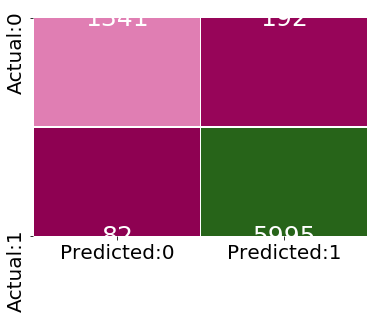

                       Model  Precision  Sensitivity  Correct_classfication  \
0  Extreme Gradient Boosting  96.896719     98.65065              96.399474   

   Misclassfication  
0          3.600526  
*************************************************************************************


In [67]:
print('Extreme Gradient Boosting :\n')
print(plot_confusion_matrix(xg,'Extreme Gradient Boosting',X_train_grid,X_test_grid, y_train_grid,y_test_grid))
print('*'*85)

In [68]:
print('Extreme Gradient Boosting :\n')
print(get_train_report(xg,X_train_grid,y_train_grid))
print(get_test_report(xg,X_test_grid,y_test_grid))
print('*'*85)

Extreme Gradient Boosting :

[22:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      3575
           1       0.98      0.99      0.98     14180

    accuracy                           0.98     17755
   macro avg

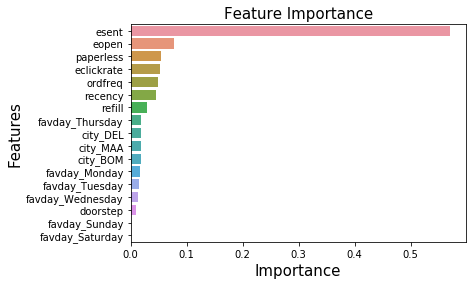

In [69]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train_grid.columns, 
                                   'Importance': xg.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# #Random forest

In [112]:
tuned_parameters = [{'n_estimators':range(20,501,50),'max_features': ['auto', 'sqrt', 'log2'],'criterion':['gini','entropy']}]

folds = 3
param_comb = 5
rf_model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(rf_model , param_distributions=tuned_parameters, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X_train_grid, y_train_grid), verbose=3, random_state=1001 )
random_search.fit(X_train_grid, y_train_grid)
random_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'n_estimators': 220, 'max_features': 'sqrt', 'criterion': 'entropy'}

In [113]:
RF= RandomForestClassifier(n_estimators= 220, max_features='sqrt', criterion='entropy')

In [114]:
random_fet_grid(X_train_grid,X_test_grid, y_train_grid,y_test_grid)

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,AUC Score
0,Extreme Gradient Boost Classifier,0.971938,0.986013,0.966097,0.978925,0.936581
1,Random Forest,0.968316,0.985684,0.962812,0.976922,0.928915


Random Forest :



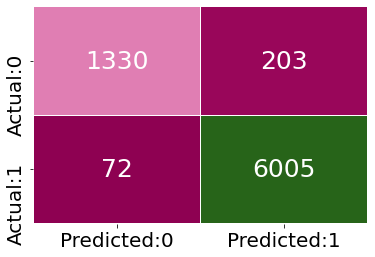

                       Model  Precision  Sensitivity  Correct_classfication  \
0  Extreme Gradient Boosting  97.193836    98.601284              96.609724   
1              Random Forest  96.730026    98.815205              96.386334   

   Misclassfication  
0          3.390276  
1          3.613666  
*************************************************************************************


In [115]:
print('Random Forest :\n')
print(plot_confusion_matrix(RF,'Random Forest',X_train_grid,X_test_grid, y_train_grid,y_test_grid))
print('*'*85)

In [116]:
print('Random Forest :\n')
print(get_train_report(RF,X_train_grid,y_train_grid))
print(get_test_report(RF,X_test_grid,y_test_grid))
print('*'*85)

Random Forest :


Train report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00     14180

    accuracy                           1.00     17755
   macro avg       1.00      1.00      1.00     17755
weighted avg       1.00      1.00      1.00     17755


Test report : 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1533
           1       0.97      0.99      0.98      6077

    accuracy                           0.96      7610
   macro avg       0.96      0.93      0.94      7610
weighted avg       0.96      0.96      0.96      7610

*************************************************************************************
